<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(2_8)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_2.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_2.8_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,74.183067,48.016909,-173.978558,-41.778582,161.713330,-203.491913
1,0.0,1.0,21.548764,55.201187,293.988732,380.738683,70.804853,309.933830
2,0.0,2.0,38.688644,21.244755,-90.302601,-20.369202,47.432831,-67.802033
3,0.0,3.0,49.308772,38.037790,59.950670,157.297232,96.341911,60.955320
4,0.0,4.0,82.545388,80.704838,242.435994,415.686219,232.839003,182.847217
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.173483,23.669606,-103.827471,-17.984382,88.263690,-106.248073
249996,999.0,246.0,38.608996,30.449766,-71.332014,7.726748,72.906557,-65.179809
249997,999.0,247.0,56.356453,77.352025,-70.496704,73.211774,110.242092,-37.030318
249998,999.0,248.0,79.091488,92.898594,-715.941394,-533.951312,144.301293,-678.252605


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    74.183067  48.016909 -173.978558  -41.778582  161.713330   
      1.0    21.548764  55.201187  293.988732  380.738683   70.804853   
      2.0    38.688644  21.244755  -90.302601  -20.369202   47.432831   
      3.0    49.308772  38.037790   59.950670  157.297232   96.341911   
      4.0    82.545388  80.704838  242.435994  415.686219  232.839003   
...                ...        ...         ...         ...         ...   
999.0 245.0  52.173483  23.669606 -103.827471  -17.984382   88.263690   
      246.0  38.608996  30.449766  -71.332014    7.726748   72.906557   
      247.0  56.356453  77.352025  -70.496704   73.211774  110.242092   
      248.0  79.091488  92.898594 -715.941394 -533.951312  144.301293   
      249.0  37.834640  78.242027  115.104602  241.181269   86.685453   

                  e_hat  
rep   index              
0.0   0.0   -203.491913  
      1.0    309.933830  
      2.0    -67.802033  
      3.0     60.955320  
      4.0    182.847217  
...                 ...  
999.0 245.0 -106.248073  
      246.0  -65.179809  
      247.0  -37.030318  
      248.0 -678.252605  
      249.0  154.495816  

[250000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    74.183067  48.016909 -173.978558  -41.778582  161.713330   
      1.0    21.548764  55.201187  293.988732  380.738683   70.804853   
      2.0    38.688644  21.244755  -90.302601  -20.369202   47.432831   
      3.0    49.308772  38.037790   59.950670  157.297232   96.341911   
      4.0    82.545388  80.704838  242.435994  415.686219  232.839003   
...                ...        ...         ...         ...         ...   
999.0 245.0  52.173483  23.669606 -103.827471  -17.984382   88.263690   
      246.0  38.608996  30.449766  -71.332014    7.726748   72.906557   
      247.0  56.356453  77.352025  -70.496704   73.211774  110.242092   
      248.0  79.091488  92.898594 -715.941394 -533.951312  144.301293   
      249.0  37.834640  78.242027  115.104602  241.181269   86.685453   

                  e_hat  
rep   index              
0.0   0.0   -203.491913  
      1.0    309.933830  
      2.0    -67.802033  
      3.0     60.955320  
      4.0    182.847217  
...                 ...  
999.0 245.0 -106.248073  
      246.0  -65.179809  
      247.0  -37.030318  
      248.0 -678.252605  
      249.0  154.495816  

[250000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,74.183067,48.016909,-173.978558,-41.778582,161.713330,-203.491913
1,0.0,1.0,21.548764,55.201187,293.988732,380.738683,70.804853,309.933830
2,0.0,2.0,38.688644,21.244755,-90.302601,-20.369202,47.432831,-67.802033
3,0.0,3.0,49.308772,38.037790,59.950670,157.297232,96.341911,60.955320
4,0.0,4.0,82.545388,80.704838,242.435994,415.686219,232.839003,182.847217
...,...,...,...,...,...,...,...,...
249995,999.0,245.0,52.173483,23.669606,-103.827471,-17.984382,88.263690,-106.248073
249996,999.0,246.0,38.608996,30.449766,-71.332014,7.726748,72.906557,-65.179809
249997,999.0,247.0,56.356453,77.352025,-70.496704,73.211774,110.242092,-37.030318
249998,999.0,248.0,79.091488,92.898594,-715.941394,-533.951312,144.301293,-678.252605


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2           e           Y       y_hat  \
rep   index                                                             
0.0   0.0    74.183067  48.016909 -173.978558  -41.778582  161.713330   
      1.0    21.548764  55.201187  293.988732  380.738683   70.804853   
      2.0    38.688644  21.244755  -90.302601  -20.369202   47.432831   
      3.0    49.308772  38.037790   59.950670  157.297232   96.341911   
      4.0    82.545388  80.704838  242.435994  415.686219  232.839003   
...                ...        ...         ...         ...         ...   
999.0 245.0  52.173483  23.669606 -103.827471  -17.984382   88.263690   
      246.0  38.608996  30.449766  -71.332014    7.726748   72.906557   
      247.0  56.356453  77.352025  -70.496704   73.211774  110.242092   
      248.0  79.091488  92.898594 -715.941394 -533.951312  144.301293   
      249.0  37.834640  78.242027  115.104602  241.181269   86.685453   

                  e_hat  
rep   index              
0.0   0.0   -203.491913  
      1.0    309.933830  
      2.0    -67.802033  
      3.0     60.955320  
      4.0    182.847217  
...                 ...  
999.0 245.0 -106.248073  
      246.0  -65.179809  
      247.0  -37.030318  
      248.0 -678.252605  
      249.0  154.495816  

[250000 rows x 6 columns]

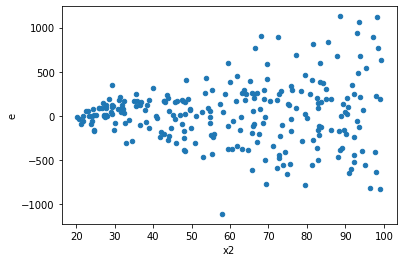

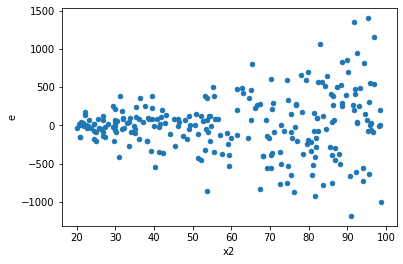

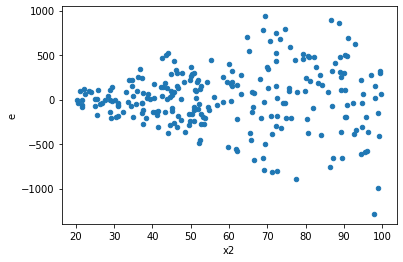

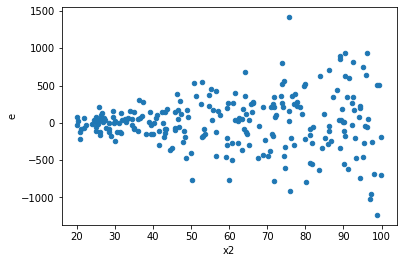

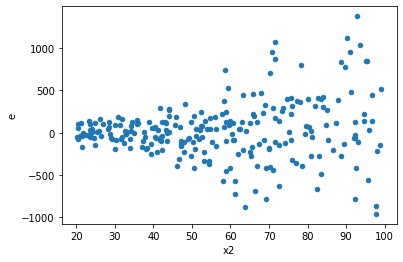

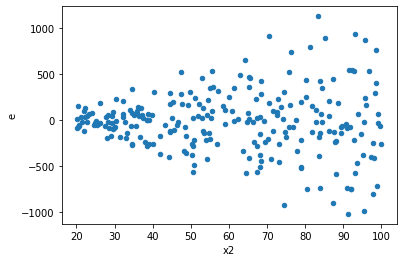

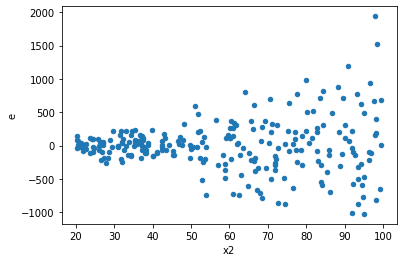

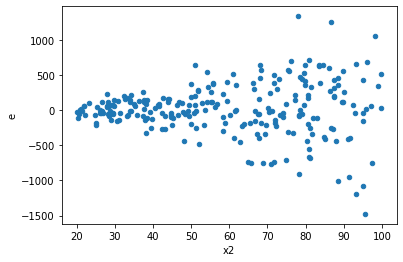

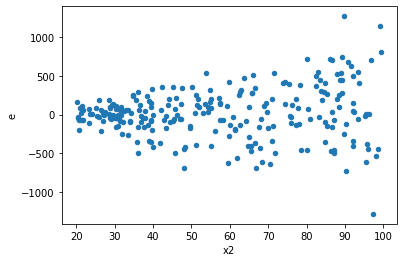

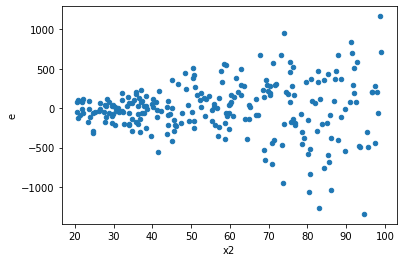

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,120.0,126.0,5052769.714664111,31795611.503764097,42106.41428886759,252346.1230457468,5.993056576001627,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
5.0,119.0,127.0,6789698.768058164,21322773.30991581,57056.292168556,167895.85283398276,2.942635184529411,4.406475850871061e-09,0.9999999977967621,2.2032379254355305e-09,Reject001=0 : Heteroscedasticity
6.0,123.0,123.0,3438648.545101546,32936579.693842225,27956.492236597936,267777.0706816441,9.578350116868247,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
9.0,123.0,123.0,4157640.744266716,24491330.723855697,33801.957270461106,199116.5099500463,5.8906798904231055,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
10.0,112.0,134.0,10604846.908386637,23227170.942276716,94686.13311059496,173337.0965841546,1.830649229087157,0.0008286955485357073,0.9995856522257321,0.00041434777426785363,Reject001=0 : Heteroscedasticity
17.0,124.0,122.0,4087205.8071901756,24410165.479771234,32961.33715475948,200083.32360468226,6.070242923254437,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
18.0,131.0,115.0,6412424.086784758,27477997.42604278,48949.80218919662,238939.10805254593,4.881308960739387,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
19.0,108.0,138.0,5604694.958957302,20298588.41755517,51895.3236940491,147091.22041706645,2.8343829452581986,1.0429535679534752e-08,0.9999999947852322,5.214767839767376e-09,Reject001=0 : Heteroscedasticity
22.0,129.0,117.0,8121374.344359792,28104036.58829632,62956.390266354974,240205.44092560958,3.815425883049392,1.4634959910608814e-12,0.9999999999992683,7.317479955304407e-13,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,122.0,124.0,19086516.55840969,11594020.680445725,156446.857036145,93500.16677778811,0.5976480994833032,0.004645210415613182,Reject001=0 : Heteroscedasticity
1.0,120.0,126.0,5052769.714664111,31795611.503764097,42106.41428886759,252346.1230457468,5.993056576001627,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
2.0,126.0,120.0,16609960.00698455,12041719.86050988,131825.0794205123,100347.665504249,0.7612183201054431,0.13098476476293408,Reject001=1 : Homoscedasticity
3.0,128.0,118.0,27403845.89080958,4153740.7096264474,214092.54602194985,35201.192454461416,0.16442044857952418,1.9154489936832768e-21,Reject001=0 : Heteroscedasticity
4.0,132.0,114.0,23968118.727106143,3350316.590850563,181576.65702353138,29388.742025004936,0.16185308456910466,4.833358171412123e-22,Reject001=0 : Heteroscedasticity
5.0,119.0,127.0,6789698.768058164,21322773.30991581,57056.292168556,167895.85283398276,2.942635184529411,4.406475850871061e-09,Reject001=0 : Heteroscedasticity
6.0,123.0,123.0,3438648.545101546,32936579.693842225,27956.492236597936,267777.0706816441,9.578350116868247,2.220446049250313e-16,Reject001=0 : Heteroscedasticity
7.0,127.0,119.0,19485786.188594054,13696453.780027812,153431.3873117642,115096.25025233456,0.7501480125345231,0.11142853508361934,Reject001=1 : Homoscedasticity
8.0,113.0,133.0,19663532.18057264,5584457.528614704,174013.55912011187,41988.402470787245,0.24129385481854887,1.230416289397997e-13,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    758
Reject001=1 : Homoscedasticity      242
Name: Result_test, dtype: int64